In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Pandas Version {pd.__version__}")

df = pd.read_excel("DataSetTB3_SHARE.xlsx",engine = "openpyxl")

# Preprocessing
df.iloc[:,2:] = df.iloc[:,2:] / 255.  

X = df.drop("label",axis=1).iloc[:,:] 
Y = df.iloc[:,1] 

x_train,x_test,y_train,y_test = train_test_split(X, Y , test_size = 0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
def getAcc(y_true,y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

Pandas Version 1.1.5
(700, 785)
(300, 785)
(700,)
(300,)


In [2]:
class KNN():
    """
    Class for using KNN algorithm

    """
    def __init__(self,n_neighbors):
        self.n_neighbors =  n_neighbors
        self.x_train = []
        self.y_train = []

    def euclidean_distance(self, x_train_obs, x_test_obs):
        return np.sqrt(np.sum( (x_train_obs - x_test_obs)**2,axis=0)) 
    
    def manhattanDistance(self, x_train_obs,x_test_obs):
        return np.sum(np.abs(x_train_obs - x_test_obs),axis=0)
    
    def minkowskiDistance(self, x_train_obs,x_test_obs,p):
        x = np.sum(np.abs(x_train_obs - x_test_obs),axis=0)
        
        def oneDivP(x): 
                return x ** 1/p
        return oneDivP(x)
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def counterTheMost(self, labels):
        counterItM8 = {key:0 for key in set(labels)}
        for label in labels:
            if label in counterItM8.keys():
                counterItM8[label] += 1
        
        return sorted(counterItM8.items(),key=lambda x : x[1])[0][0]

    def predict(self,x_test):
        y_pred= [self.do_calculation(x) for x in x_test]
        return np.array(y_pred,dtype=np.int32)

    def do_calculation(self,x_test_obs):
        distanceMinkowski = [self.minkowskiDistance(x_train_obs,x_test_obs,5) for x_train_obs in self.x_train]   
        distanceEuclidean = [self.euclidean_distance(x_train_obs,x_test_obs) for x_train_obs in self.x_train]   
        distanceManhattan = [self.manhattanDistance(x_train_obs, x_test_obs) for x_train_obs in self.x_train]
        
        #Get The Lowest Distances index
        lowestDistancesMinkowski = np.argsort(distanceMinkowski)[:self.n_neighbors]
        lowestDistancesEuclidean = np.argsort(distanceEuclidean)[:self.n_neighbors]
        lowestDistancesManhattan = np.argsort(distanceManhattan)[:self.n_neighbors]
        # get the labels :
        labelsMinkowski = [self.y_train[indx] for indx in lowestDistancesMinkowski]
        labelsEuclidean = [self.y_train[indx] for indx in lowestDistancesEuclidean]
        labelsManhattan = [self.y_train[indx] for indx in lowestDistancesManhattan]
        
        return self.counterTheMost(labelsMinkowski), self.counterTheMost(labelsEuclidean), self.counterTheMost(labelsManhattan)


In [3]:
dfResult =pd.DataFrame(columns=["akurasiManhattanTrain","akurasiManhattanTest",
                                "akurasiEuclideanTrain","akurasiEuclideanTest",
                                "akurasiMinkowskiTrain","akurasiMinkowskiTest"],index=range(8))

for i in range(2,10,1):

    print(f"sek : {i}")
    x_predicted = pd.DataFrame(columns=["idData","label"])
    x_predicted["idData"] = x_train["idData"]
    x_predicted["label"] = y_train
    x_predicted["manhattan"] = np.nan
    x_predicted["euclidean"] = np.nan
    x_predicted["minkowski"] = np.nan
    knnOBJ = KNN(i)
    knnOBJ.fit(np.array(x_train.iloc[:,1:],dtype=np.float32), np.array(y_train,dtype=np.float32))
    ypred = knnOBJ.predict(np.array(x_train.iloc[:,1:],dtype=np.float32))

    x_predicted["minkowski"] = ypred[:,0]
    x_predicted["manhattan"] = ypred[:,2]
    x_predicted["euclidean"] = ypred[:,1]
    ypred = knnOBJ.predict(np.array(x_train.iloc[:,1:],dtype=np.float32))
    
    dfResult.loc[i - 1,'akurasiManhattanTrain'] = getAcc(y_train,ypred[:,2])
    dfResult.loc[i - 1, "akurasiEuclideanTrain"] = getAcc(y_train,ypred[:,1])
    dfResult.loc[i - 1,"akurasiMinkowskiTrain"] = getAcc(y_train,ypred[:,0])

    y_predTest = knnOBJ.predict(np.array(x_test.iloc[:,1:],dtype=np.float32))
    dfResult.loc[i - 1,"akurasiManhattanTest"] = getAcc(y_test,y_predTest[:,2])
    dfResult.loc[i - 1,"akurasiEuclideanTest"]= getAcc(y_test,y_predTest[:,1])
    dfResult.loc[i - 1,"akurasiMinkowskiTest"] = getAcc(y_test,y_predTest[:,0])

sek : 2
sek : 3
sek : 4
sek : 5
sek : 6
sek : 7
sek : 8
sek : 9


In [4]:
dfResult.index=["neighbors","n: 2",
               "n: 3","n: 4","n: 5",
               "n: 6", "n: 7", "n : 8","n: 9" ]
dfResult

,akurasiManhattanTrain,akurasiManhattanTest,akurasiEuclideanTrain,akurasiEuclideanTest,akurasiMinkowskiTrain,akurasiMinkowskiTest
neighbors,NaN,NaN,NaN,NaN,NaN,NaN
n: 2,0.918571,0.773333,0.915714,0.79,0.918571,0.773333
n: 3,0.78,0.71,0.792857,0.696667,0.78,0.71
n: 4,0.69,0.613333,0.711429,0.65,0.69,0.613333
n: 5,0.61,0.566667,0.631429,0.553333,0.61,0.566667
n: 6,0.548571,0.516667,0.557143,0.52,0.548571,0.516667
n: 7,0.494286,0.47,0.518571,0.483333,0.494286,0.47
n : 8,0.458571,0.413333,0.464286,0.42,0.458571,0.413333
n: 9,0.428571,0.366667,0.435714,0.37,0.428571,0.366667


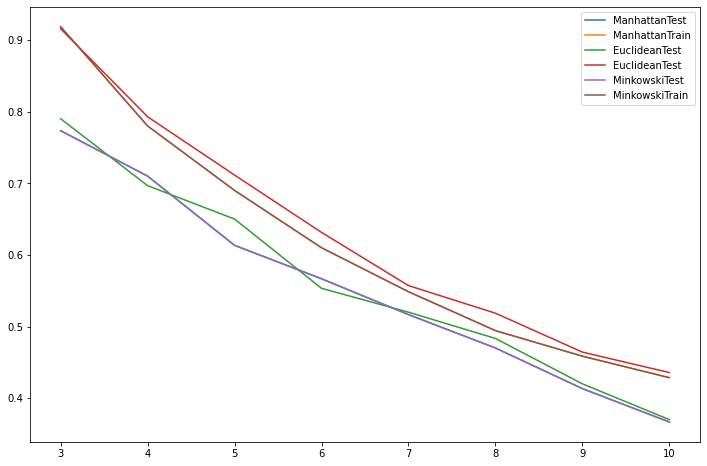

In [5]:
plt.figure(figsize=(12,8))

sns.lineplot(y = map(float,dfResult["akurasiManhattanTest"].values),x = range(2,11),label="ManhattanTest")
sns.lineplot(y = map(float,dfResult["akurasiManhattanTrain"].values),x = range(2,11),label="ManhattanTrain")

sns.lineplot(y = map(float,dfResult["akurasiEuclideanTest"].values),x = range(2,11),label="EuclideanTest")
sns.lineplot(y = map(float,dfResult["akurasiEuclideanTrain"].values),x = range(2,11),label="EuclideanTest")

sns.lineplot(y = map(float,dfResult["akurasiMinkowskiTest"].values),x = range(2,11),label="MinkowskiTest")
sns.lineplot(y = map(float,dfResult["akurasiMinkowskiTrain"].values),x = range(2,11),label="MinkowskiTrain")
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis="y", colors="black")
plt.legend(loc='best')

In [6]:
x_test.iloc[:,1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Using Best Params
knnEuclidean= KNN(2)
knnEuclidean.fit(np.array(x_train.iloc[:,1:],dtype=np.float32),np.array(y_train,dtype=np.float32))
ypred = knnEuclidean.predict(np.array(x_test.iloc[:,1:],dtype=np.float32))
print(getAcc(y_test,ypred[:,1]))

0.79


In [8]:
dfOutputLatih = pd.DataFrame(columns=["idData","Klasifikasi","Akurasi"])
dfOutputLatih["idData"] = x_test["idData"]
dfOutputLatih["Klasifikasi"] = ypred[:,1]
dfOutputLatih["Akurasi"] = ""
dfOutputLatih.iloc[0,2] = getAcc(y_test,ypred[:,1])
dfOutputLatih

,idData,Klasifikasi,Akurasi
841,842,8,0.79
956,957,7,
544,545,8,
173,174,1,
759,760,7,
...,...,...,...
949,950,9,
802,803,8,
293,294,2,
414,415,4,


In [9]:
dfOutputLatih.to_excel("OutputLatih.xlsx",index=False)

In [10]:
def differentTestClassification(data,ytest,ypred):
    table = pd.DataFrame(columns = ["idData","True","Pred"])
    diff = []
    ypred = ypred[:,1]
    for indx,content in enumerate(zip(data["idData"],ytest)):
        id_data = content[0]
        if content[1] != ypred[indx]:
            print(f" {id_data} = PRED {ypred[indx]} -> TRUE {content[1]}")
            table.loc[indx,"idData"] = id_data
            table.loc[indx,"True"] = content[1]
            table.loc[indx,"Pred"] = ypred[indx]
            diff.append(id_data)
    return diff ,table

_, table = differentTestClassification(x_test,y_test,ypred)

 957 = PRED 7 -> TRUE 9
 545 = PRED 8 -> TRUE 5
 231 = PRED 0 -> TRUE 2
 393 = PRED 8 -> TRUE 3
 846 = PRED 9 -> TRUE 8
 278 = PRED 0 -> TRUE 2
 219 = PRED 1 -> TRUE 2
 905 = PRED 1 -> TRUE 9
 979 = PRED 7 -> TRUE 9
 404 = PRED 9 -> TRUE 4
 884 = PRED 1 -> TRUE 8
 288 = PRED 8 -> TRUE 2
 942 = PRED 4 -> TRUE 9
 388 = PRED 5 -> TRUE 3
 249 = PRED 1 -> TRUE 2
 629 = PRED 0 -> TRUE 6
 299 = PRED 0 -> TRUE 2
 449 = PRED 9 -> TRUE 4
 635 = PRED 4 -> TRUE 6
 626 = PRED 1 -> TRUE 6
 441 = PRED 1 -> TRUE 4
 427 = PRED 9 -> TRUE 4
 704 = PRED 1 -> TRUE 7
 708 = PRED 2 -> TRUE 7
 702 = PRED 9 -> TRUE 7
 856 = PRED 9 -> TRUE 8
 827 = PRED 9 -> TRUE 8
 838 = PRED 5 -> TRUE 8
 212 = PRED 9 -> TRUE 2
 825 = PRED 3 -> TRUE 8
 863 = PRED 3 -> TRUE 8
 549 = PRED 3 -> TRUE 5
 794 = PRED 9 -> TRUE 7
 902 = PRED 7 -> TRUE 9
 444 = PRED 9 -> TRUE 4
 409 = PRED 9 -> TRUE 4
 445 = PRED 9 -> TRUE 4
 812 = PRED 9 -> TRUE 8
 508 = PRED 3 -> TRUE 5
 286 = PRED 1 -> TRUE 2
 379 = PRED 8 -> TRUE 3
 577 = PRED 9 ->

In [11]:
pd.set_option("max_rows",None)


In [12]:
dfTest = pd.read_excel("DataSetTB3_SHARE.xlsx",sheet_name='Submit',engine = "openpyxl")
dfTest.iloc[:,1:] /= 255

In [13]:
ypred = knnEuclidean.predict(np.array(dfTest.iloc[:,1:],dtype=np.float32))
dfOutputTest= pd.DataFrame(columns=["idData","Klasifikasi"])
dfOutputTest["idData"] = dfTest["idData"]
dfOutputTest["Klasifikasi"] = ypred[:,1]

In [14]:
dfOutputTest.to_excel("OutputSubmit.xlsx",index=False)